In [1]:
import pdal
import json
import numpy as np

In [2]:
bounds = ([333060, 333090], [7396500, 7396530])

In [3]:
ept = [
    {
      "type": "readers.ept",
      "filename": "https://ept-m3dc-pmsp.s3-sa-east-1.amazonaws.com/ept.json",
      "bounds": str(bounds)
    },
    {   
        "type":"filters.hag_delaunay"
#     },
#     {   "type":"filters.eigenvalues",
#         "knn":16
    },
    {   "type":"filters.normal",
        "knn":16
    },
    {
        "type":"filters.dbscan",
        "min_points":10,
        "eps":2.0,
        "dimensions":"X,Y,Z"
    },
#     {
#         "type":"filters.cluster"
#     },
    {
        "type":"writers.las",
        "compression":"laszip",
        "filename":"results/coreto-luz.laz"
    }
]

pipeline = pdal.Pipeline(json.dumps(ept))
pipeline.validate()
%time n_points = pipeline.execute()
print(f'Pipeline selected {n_points} points')

CPU times: user 2.19 s, sys: 116 ms, total: 2.3 s
Wall time: 2.39 s
Pipeline selected 13496 points


In [4]:
pipeline.schema

{'schema': {'dimensions': [{'name': 'X', 'size': 8, 'type': 'floating'},
   {'name': 'Y', 'size': 8, 'type': 'floating'},
   {'name': 'Z', 'size': 8, 'type': 'floating'},
   {'name': 'Intensity', 'size': 2, 'type': 'unsigned'},
   {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'},
   {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'},
   {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'},
   {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'},
   {'name': 'Classification', 'size': 1, 'type': 'unsigned'},
   {'name': 'ScanAngleRank', 'size': 4, 'type': 'floating'},
   {'name': 'UserData', 'size': 1, 'type': 'unsigned'},
   {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'},
   {'name': 'GpsTime', 'size': 8, 'type': 'floating'},
   {'name': 'Red', 'size': 2, 'type': 'unsigned'},
   {'name': 'Green', 'size': 2, 'type': 'unsigned'},
   {'name': 'Blue', 'size': 2, 'type': 'unsigned'},
   {'name': 'OriginId', 'size': 4, 'type': 'unsigned'},
   {'name': '

In [5]:
import pandas as pd
arr = pipeline.arrays[0]
df = pd.DataFrame(arr)
# print(df.head().to_latex(index=False))
df.head()

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,333069.84,7396523.41,737.12,6,2,2,1,0,2,18.0,...,22272,24320,23808,2416,0.000000,-0.079871,0.097067,0.992068,0.011714,-1
1,333068.42,7396522.83,756.77,22,1,1,0,0,5,-11.0,...,19456,22272,19968,2416,19.673504,0.546278,0.058037,0.835591,0.040138,0
2,333080.83,7396514.57,749.52,11,1,1,0,0,5,-10.0,...,45824,35584,31744,2416,12.130000,-0.884660,-0.358011,0.298671,0.111185,1
3,333060.32,7396514.71,749.64,2,1,2,0,0,5,-10.0,...,7168,9984,15360,2416,12.290000,-0.072161,0.995263,0.065155,0.034176,-1
4,333078.72,7396527.59,750.81,7,1,2,0,0,5,18.0,...,17920,23808,17152,2416,13.511737,0.994726,0.062299,0.081476,0.042102,1


In [6]:
# Reduzindo valores a mínimos para poderem ser visualizados
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']] - df[['X', 'Y', 'Z']].min()

In [7]:
df.Classification.unique()

array([ 2,  5, 19, 20,  6], dtype=uint8)

In [8]:
## Separando apenas Buildings
bd = df[df.Classification.isin([6])].reset_index()

In [9]:
bd

,index,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,39,20.20,17.27,6.96,15,1,1,0,0,6,...,29696,24064,21504,2416,5.998857,0.193270,0.159118,0.968157,0.009492,5
1,42,16.56,8.33,7.56,24,1,1,1,0,6,...,43264,28416,25088,2416,6.650000,0.088560,-0.285405,0.954306,0.013607,5
2,43,16.54,17.53,7.78,17,1,1,0,0,6,...,43776,28672,25088,2416,6.730000,0.301413,0.212009,0.929625,0.017823,5
3,44,16.49,20.37,7.70,28,1,1,1,0,6,...,43776,30208,26624,2416,6.763024,0.332464,0.027405,0.942718,0.009182,5
4,45,14.68,17.22,8.75,28,1,1,0,0,6,...,55808,43520,36864,2416,7.690000,0.121101,0.249754,0.960707,0.040560,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,11288,20.53,15.25,7.15,14,2,2,1,0,6,...,42752,33792,28416,2416,6.470000,0.215078,0.170854,0.961535,0.023760,5
2144,11289,20.39,15.70,7.22,24,2,2,1,0,6,...,47360,34816,29440,2416,6.230000,0.235390,0.062128,0.969913,0.013879,5
2145,11290,20.25,16.12,6.98,25,2,2,1,0,6,...,46080,32768,27904,2416,5.990000,0.205689,0.169605,0.963808,0.015812,5
2146,11291,19.97,17.00,6.86,28,1,1,1,0,6,...,46336,33024,29440,2416,5.870000,0.215356,0.132527,0.967501,0.010533,5


In [10]:
bd.ClusterID.unique()

array([ 5, -1,  8])

In [11]:
bd[bd.ClusterID == -1]

,index,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
30,409,14.59,0.03,3.93,43,1,1,1,0,6,...,50432,49408,45056,2416,3.15,0.084784,0.982784,0.164155,0.015247,-1


In [12]:
color_choices = np.random.rand(bd.ClusterID.max()+1, 3)

In [13]:
colors = list(map(lambda x: color_choices[x], bd.ClusterID))

In [14]:
bd

,index,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,39,20.20,17.27,6.96,15,1,1,0,0,6,...,29696,24064,21504,2416,5.998857,0.193270,0.159118,0.968157,0.009492,5
1,42,16.56,8.33,7.56,24,1,1,1,0,6,...,43264,28416,25088,2416,6.650000,0.088560,-0.285405,0.954306,0.013607,5
2,43,16.54,17.53,7.78,17,1,1,0,0,6,...,43776,28672,25088,2416,6.730000,0.301413,0.212009,0.929625,0.017823,5
3,44,16.49,20.37,7.70,28,1,1,1,0,6,...,43776,30208,26624,2416,6.763024,0.332464,0.027405,0.942718,0.009182,5
4,45,14.68,17.22,8.75,28,1,1,0,0,6,...,55808,43520,36864,2416,7.690000,0.121101,0.249754,0.960707,0.040560,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,11288,20.53,15.25,7.15,14,2,2,1,0,6,...,42752,33792,28416,2416,6.470000,0.215078,0.170854,0.961535,0.023760,5
2144,11289,20.39,15.70,7.22,24,2,2,1,0,6,...,47360,34816,29440,2416,6.230000,0.235390,0.062128,0.969913,0.013879,5
2145,11290,20.25,16.12,6.98,25,2,2,1,0,6,...,46080,32768,27904,2416,5.990000,0.205689,0.169605,0.963808,0.015812,5
2146,11291,19.97,17.00,6.86,28,1,1,1,0,6,...,46336,33024,29440,2416,5.870000,0.215356,0.132527,0.967501,0.010533,5


In [15]:
import ipyvolume as p3 

fig = p3.figure(width=1000)
fig.xlabel='Y'
fig.ylabel='Z'
fig.zlabel='X'
all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=colors, size=1)
# all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=list(map(lambda x: [x,x,x], bd.Curvature)), size=1, marker='square_2d')

p3.squarelim()

p3.show()

In [16]:
roof_quiver = p3.quiver(bd['Y'], bd['Z'], bd['X'], bd['NormalY'], bd['NormalZ'], bd['NormalX'], color='orange', size=5)
fig.scatters.append(roof_quiver)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc048c9fbd0>,
      dtype=object)

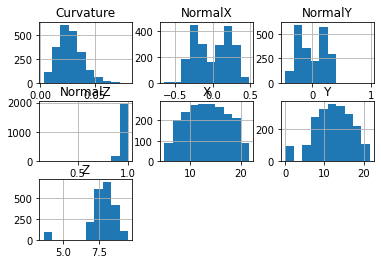

In [15]:
bd[['X', 'Y','Z', 'NormalX', 'NormalY', 'NormalZ', 'Curvature']].hist()

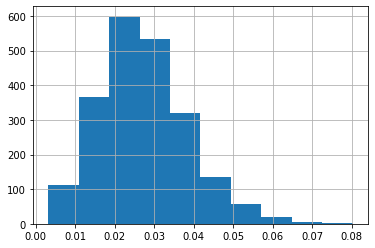

In [16]:
bd.Curvature.hist()

In [17]:
from scipy.spatial import Delaunay
tri = Delaunay(bd[['X', 'Y']].to_numpy())

In [18]:
roof_model = p3.plot_trisurf(bd['Y'], bd['Z'], bd['X'], tri.simplices, color='red')
fig.meshes.append(roof_model)
roof_quiver.visible = False

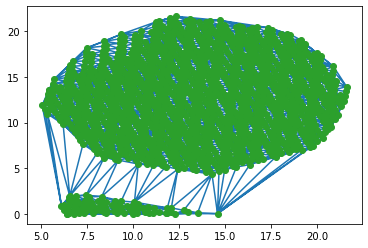

In [19]:
import matplotlib.pyplot as plt

plt.triplot(bd['X'], bd['Y'], tri.simplices)
plt.plot(bd['X'], bd['Y'], 'o')
plt.show()